# Poboljšanje rezultata članka

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

## Priprema podataka

In [2]:
X = pd.read_csv("diabetes.csv")

In [3]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Umjesto, kao u članku, da vrijednosti postavljene na nule koje nemaju smisla, zamijenimo medijanima, provest ćemo KNN i tako zamijeniti te vrijednosti s prosječnom vrijednosti K najbližih susjeda na temelju dostupnih podataka..

In [4]:
from sklearn.impute import KNNImputer

columns_to_knn = ['Glucose', 'BloodPressure', 'SkinThickness',
                           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Zamjena nula s NaN vrijednostima samo za odabrane stupce
X[columns_to_knn] = X[columns_to_knn].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
X[columns_to_knn] = imputer.fit_transform(X[columns_to_knn])
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.601562,72.325781,29.096615,152.724479,32.434479,0.471876,33.240885,0.348958
std,3.369578,30.494403,12.193908,9.424697,98.502206,6.883819,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.450000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,131.600000,32.190000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,191.050000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Odvajanje značajki i ciljne varijable
X_z = X.drop('Outcome', axis=1)
y = X['Outcome']

S obzirom na to da imamo neuravnoteženost klasa, želimo ih balansirati.

In [8]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
X_r, y_r = over.fit_resample(X_z, y)

In [9]:
print(y_r.value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


Podijelit ćemo skup podataka 70/30 na skup za učenje i ispitni skup prije početka treniranja modela te normalizirati.

In [17]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_r,y_r,train_size = 0.7)
#normalizacija
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeli korišteni u članku

Zanima nas kakav je utjecaj ovakvih podataka na modele korištene u članku.

### Decision Tree

Accuracy: 0.81


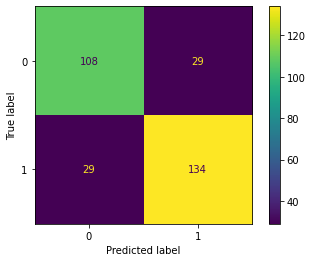

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_scaled, y_train)
predictions = dt.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, predictions, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dt.classes_)
disp.plot()

### Random Forest

Accuracy: 0.85


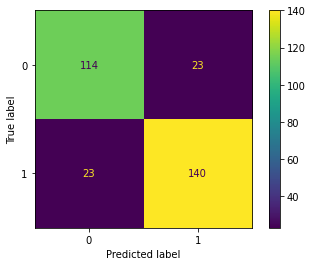

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
predictionsrf = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictionsrf)
print(f'Accuracy: {accuracy:.2f}')
cmrf = confusion_matrix(y_test, predictionsrf, labels=rf.classes_)
disprf = ConfusionMatrixDisplay(confusion_matrix = cmrf, display_labels=rf.classes_)
disprf.plot()

### Naive Bayes

Accuracy: 0.72


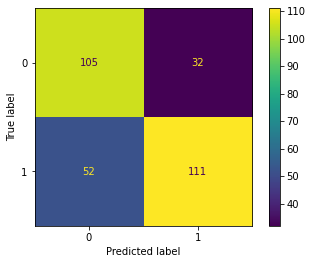

In [113]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
predictionsnb = nb.predict(X_test)
accuracy = accuracy_score(y_test, predictionsnb)
print(f'Accuracy: {accuracy:.2f}')

cmnb = confusion_matrix(y_test, predictionsnb, labels=nb.classes_)
dispnb = ConfusionMatrixDisplay(confusion_matrix = cmnb, display_labels=nb.classes_)
dispnb.plot()

### Metrike

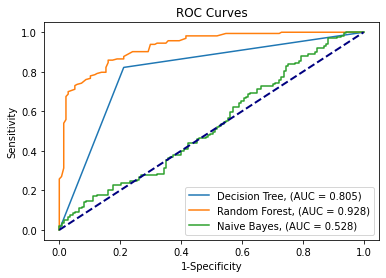

In [121]:
from sklearn.metrics import roc_curve, auc

y_probsdt = dt.predict_proba(X_test_scaled)[:, 1]
y_probsrf = rf.predict_proba(X_test_scaled)[:, 1]
y_probsnb = nb.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probsdt)
roc_auc1 = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Decision Tree, (AUC = {roc_auc1:.3f})')

fpr, tpr, thresholds = roc_curve(y_test, y_probsrf)
roc_auc2 = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Random Forest, (AUC = {roc_auc2:.3f})')

fpr, tpr, thresholds = roc_curve(y_test, y_probsnb)
roc_auc3 = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Naive Bayes, (AUC = {roc_auc3:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

Najvišu AUC vrijednost ima klasifikator Random Forest, a najmanju Naive Bayes. U članku je najvišu imao također model Random Forest s 0.862, najmanju Decision Tree s 0.785, a Naive Bayes 0.846.

In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score

#"DT"
acc1 = accuracy_score(y_test,predictions)
pr1 = precision_score(y_test,predictions)
se1 = recall_score(y_test,predictions)
sp1 = cm[0, 0] / (cm[0, 0] + cm[0, 1])
fs1 = f1_score(y_test,predictions)

#"RF"
acc2 = accuracy_score(y_test,predictionsrf)
pr2 = precision_score(y_test,predictionsrf)
se2 = recall_score(y_test,predictionsrf)
sp2 = cmrf[0, 0] / (cmrf[0, 0] + cmrf[0, 1])
fs2 = f1_score(y_test,predictionsrf)

#"NB"
acc3 = accuracy_score(y_test,predictionsnb)
pr3 = precision_score(y_test,predictionsnb)
se3 = recall_score(y_test,predictionsnb)
sp3 = cmnb[0, 0] / (cmnb[0, 0] + cmnb[0, 1])
fs3 = f1_score(y_test,predictionsnb)

results_df = pd.DataFrame({
    'Model': ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1-Score', 'AUC'],
    'Decision Tree': [acc1, pr1,  sp1, se1, fs1, roc_auc1],
    'Random Forest': [acc2, pr2,  sp2, se2, fs2, roc_auc2],
    'Naive Bayes': [acc3, pr3, sp3, se3, fs3, roc_auc3]
})

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

results_df.set_index('Model',inplace=True)

transposed_results_df = results_df.transpose()
styled_transposed_results_df = transposed_results_df.style.apply(highlight_max, subset=transposed_results_df.columns)

styled_transposed_results_df

Model,Accuracy,Precision,Sensitivity,Specificity,F1-Score,AUC
Decision Tree,0.806667,0.822086,0.788321,0.822086,0.822086,0.805204
Random Forest,0.846667,0.858896,0.832117,0.858896,0.858896,0.927813
Naive Bayes,0.720000,0.776224,0.766423,0.680982,0.725490,0.528413


Random Forest je i u članku davao najbolje vrijednosti za sve metrike osim "Sensitivity" za koju je Decision Tree. Točnost Random Forest veća je nego u članku gdje je iznosila 0.7957. Također je veća i za Decision Tree za koji je iznosila 0.7478, a manja za Naive Bayes koja je bila 0.7867.

## SVM

Proveli smo rešetkasto pretraživanje radi pronalaska optimalnih parametara i na najboljem dobivenom modelu SVM proveli učenje.

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

C = []
for i in range(0, 6):
        C.append(2**i)

param_grid = {
    'C': C,  # Hiperparametar C
    'kernel': ['linear', 'rbf', 'poly'],  # Tip jezgre
    'gamma': ['scale', 'auto', 0.1, 1]  # Hiperparametar gamma (važan kod 'rbf' i 'poly' jezgri)
}
svm_model = SVC()

# Inicijalizacija GridSearchCV za pretraživanje po rešetci
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Primjena GridSearchCV na trening podacima
grid_search.fit(X_train_scaled, y_train)

# Najbolji model i parametri
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predviđanje na test setu
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Najbolji parametri: {best_params}')
print(f'Accuracy: {accuracy:.2f}')

Najbolji parametri: {'C': 4, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.81


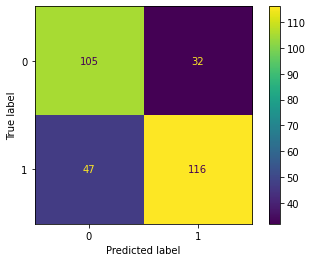

In [125]:
cms = confusion_matrix(y_test, y_pred)
disps = ConfusionMatrixDisplay(confusion_matrix = cms, display_labels=best_model.classes_)
disps.plot()

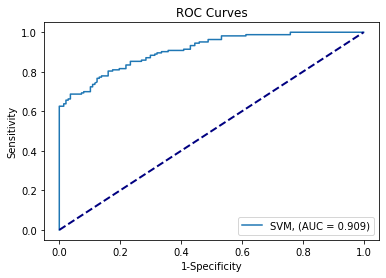

In [142]:
bmsvm = SVC(C=4, kernel='rbf', gamma=1.0, probability=True).fit(X_train_scaled, y_train)
y_probss = bmsvm.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probss)
roc_aucs = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'SVM, (AUC = {roc_aucs:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

AUC vrijednost od 0.909 bolja je od sva tri modela u članku.

In [139]:
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
pr = precision_score(y_test,y_pred)
se = recall_score(y_test,y_pred)
sp = cmnb[0, 0] / (cmnb[0, 0] + cmnb[0, 1])
fs = f1_score(y_test,y_pred)

results_df = pd.DataFrame({
    'Model': ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1-Score', 'AUC'],
    'SVM': [accuracy, pr,  sp, se, fs, roc_aucs]})
results_df.set_index('Model',inplace=True)

transposed_results_df = results_df.transpose()
transposed_results_df

Model,Accuracy,Precision,Sensitivity,Specificity,F1-Score,AUC
SVM,0.81,0.858108,0.766423,0.779141,0.81672,0.90905


Točnost, specifičnost i AUC imaju veće vrijednosti od maksimalnih u članku između tri modela.

## Gradient Boosting

In [75]:
from xgboost import XGBClassifier
xcla = XGBClassifier()
xcla.fit(X_train_scaled, y_train)
predicted = xcla.predict(X_test_scaled)
acu = accuracy_score(predicted, y_test)
print(f'Accuracy: {acu:.2f}')

Accuracy: 0.80


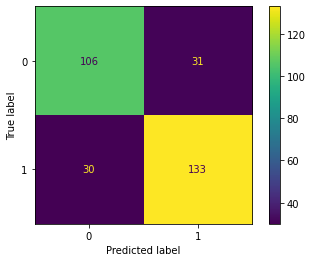

In [141]:
cmgb = confusion_matrix(y_test, predicted)
dispgb = ConfusionMatrixDisplay(confusion_matrix = cmgb, display_labels=xcla.classes_)
dispgb.plot()

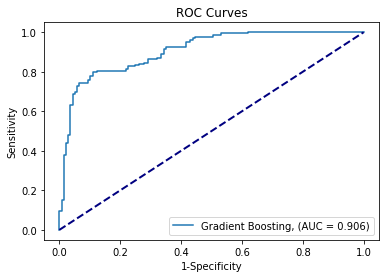

In [143]:
y_probsgb = xcla.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probsgb)
roc_aucgb = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Gradient Boosting, (AUC = {roc_aucgb:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

AUC vrijednost modela bolja je od sva tri modela korištena u članku.

In [144]:
accuracy = accuracy_score(y_test, predicted)
pr = precision_score(y_test,predicted)
se = recall_score(y_test,predicted)
sp = cmnb[0, 0] / (cmnb[0, 0] + cmnb[0, 1])
fs = f1_score(y_test,predicted)

results_df = pd.DataFrame({
    'Model': ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1-Score', 'AUC'],
    'Gradient Boosting': [accuracy, pr,  sp, se, fs, roc_aucgb]})
results_df.set_index('Model',inplace=True)

transposed_results_df = results_df.transpose()
transposed_results_df

Model,Accuracy,Precision,Sensitivity,Specificity,F1-Score,AUC
Gradient Boosting,0.796667,0.810976,0.766423,0.815951,0.813456,0.905513


Točnost je samo mrvicu bolja od točnosti Random Forest 0.7957 što je najviša točnost od sva tri modela u članku. Bolje su i specifičnost i AUC vrijednost od onih najboljih u članku koje opet pripadaju Random Forest modelu.